# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**


--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

### **Please read the instructions carefully before starting the project.**

This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. Read along carefully to complete the project.

* Blanks '_______' are provided in the notebook that needs to be filled with an appropriate code to get the correct result. Please replace the blank with the right code snippet. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# Fill in the blank" or "# Complete the code". Running incomplete code may throw an error.
* Remove the blank and state your observations in detail wherever the mark down says 'Write your observations here:_________'
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* You can the results/observations derived from the analysis here and use them to create your final report.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [44]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

!pip install tensorflow

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization

from tensorflow.keras.layers import Conv2D, LeakyReLU, MaxPooling2D, Flatten, Dense

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

**Let us check the version of tensorflow.**

In [4]:
print(tf.__version__)

2.18.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [5]:
import h5py

# Open the file as read only
# User can make changes in the path as required

h5f = h5py.File('/content/drive/MyDrive/Colab Notebooks/SVHN_single_grey1.h5', 'r')

# Load the training and the test dataset

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]


# Close this file

h5f.close()

Let's check the number of images in the training and the testing dataset.

In [6]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**
- There are 42,000 images in the training data and 18,000 images in the testing data.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

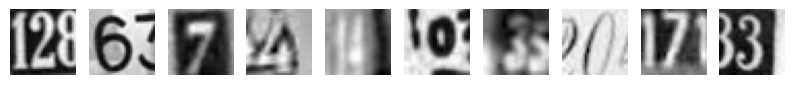

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [7]:
# Visualizing the first 10 images in the dataset and printing their labels

plt.figure(figsize = (10, 1))

for i in range(10):

    plt.subplot(1, 10, i+1)

    plt.imshow(X_train[i], cmap = "gray")

    plt.axis('off')

plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [8]:
# Shape and the array of pixels for the first image

print("Shape:", X_train[0].shape)

print()

print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [9]:
print('Training set:', X_train.shape, y_train.shape)

Training set: (42000, 32, 32) (42000,)


In [10]:
# Reshaping the dataset to flatten them. We are reshaping the 2D image into 1D array

X_train = X_train.reshape(X_train.shape[0], 1024)

X_test = X_test.reshape(X_test.shape[0], 1024)

In [11]:
print(X_train[:5, :10])  # Prints the first 10 values of the first 5 images in X_train

[[ 33.0704  30.2601  26.852   25.8844  28.5421  33.1673  33.9069  31.277
   27.3313  23.9556]
 [ 86.9591  87.0685  88.3735  88.2272  87.0424  88.0746  89.0637  89.6399
   87.6401  87.4121]
 [123.125  125.8581 122.0757 116.0054 112.1629 110.7932 112.1351 112.8361
  112.7221 112.7822]
 [147.6196 139.6204 142.6201 147.2175 151.9181 155.6188 157.6186 158.6185
  159.1023 158.5153]
 [153.989  155.1783 157.4276 157.2319 158.2919 161.0205 162.988  163.9448
  160.9451 156.9347]]


### **Normalize the train and the test data.**

In [12]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train / 255

X_test = X_test / 255

In [13]:
# New shape

print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


In [14]:
# One-hot encode output

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

# Test labels

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

One-Hot Encoding

This section deals with a preprocessing technique called one-hot encoding applied to the target variables (y_train and y_test).


  
 # One-hot encode output

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

# Test labels

y_test
Use code with caution
y_train and y_test: These variables hold the labels (the actual digits each image represents) for the training and testing datasets respectively.
to_categorical(): This function from tensorflow.keras.utils is the core of one-hot encoding. It transforms the labels into a format suitable for the neural network.
Why One-Hot Encoding? Machine learning algorithms generally work better with numerical data. One-hot encoding converts categorical data (like digit labels 0-9) into a numerical format. It does this by creating new binary columns for each unique category (digit). A value of 1 in a column indicates the presence of that category for a given data point, and 0 indicates its absence.
Example: If an image represents the digit '3', its one-hot encoded representation would be [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].
The last line (y_test): This line simply displays the y_test data after it has been one-hot encoded. This is likely for verification or debugging purposes.

**Observation:**
- Notice that each entry of the target variable is a one-hot encoded vector instead of a single label.

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

In [15]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

Setting the Random Seed for Reproducibility

This code snippet is crucial for ensuring that the experiments conducted using this notebook are reproducible. It does this by setting a fixed seed for the random number generators used by three different libraries:

NumPy (np): np.random.seed(42) sets the seed for NumPy's random number generator. Many machine learning operations within NumPy rely on randomness (e.g., initializing weights, shuffling data).
Python's built-in random module: random.seed(42) sets the seed for the standard random module in Python. This is used for general-purpose random number generation.
TensorFlow (tf): tf.random.set_seed(42) sets the seed for TensorFlow's random number generator. TensorFlow uses randomness extensively, especially in neural network initialization and operations like dropout.
Why is this important?

Deep learning models often involve random initialization of weights and biases. If the random seed is not set, each time you run the code, you will get different initial values, potentially leading to different results. By fixing the seed to a specific number (in this case, 42), you ensure that the random numbers generated are the same every time you execute the code.

This makes your results reproducible, allowing you to compare different model architectures or hyperparameter settings more fairly and consistently.

In simpler terms, this code ensures that if you or someone else runs this code multiple times, you will get the same results, eliminating the variability due to randomness. This is vital for scientific rigor and reliable comparisons.

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [16]:
# Define the model

def nn_model_1():

    model = Sequential()

    # Add layers as per the architecture mentioned above in the same sequence

    model.add(Dense(64, activation='relu', input_shape=(1024,)))

    model.add(Dense(32, activation='relu')) #second hidden layer

    model.add(Dense(10, activation='softmax')) #Output layer

    # Compile the model

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    return model

In [17]:
# Build the model

model_1 = nn_model_1()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Print the summary

model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,010 (265.66 KB)

 Trainable params: 68,010 (265.66 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Fit the model

history_model_1 = model_1.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, verbose=1)


Epoch 1/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1088 - loss: 2.3082 - val_accuracy: 0.1744 - val_loss: 2.2324
Epoch 2/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2135 - loss: 2.1556 - val_accuracy: 0.3065 - val_loss: 1.9384
Epoch 3/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3158 - loss: 1.9163 - val_accuracy: 0.3844 - val_loss: 1.7683
Epoch 4/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4275 - loss: 1.6879 - val_accuracy: 0.5104 - val_loss: 1.4989
Epoch 5/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5228 - loss: 1.4552 - val_accuracy: 0.5558 - val_loss: 1.3696
Epoch 6/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5636 - loss: 1.3518 - val_accuracy: 0.5798 - val_loss: 1.3064
Epoch 7/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5877 - loss: 1.2884 - val_accuracy: 0.6018 - val_loss: 1.2553
Epoch 8/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6060 - loss: 1.2421 - val_accuracy: 0.

### **Plotting the validation and training accuracies**

### **Write your observations on the below plot.**

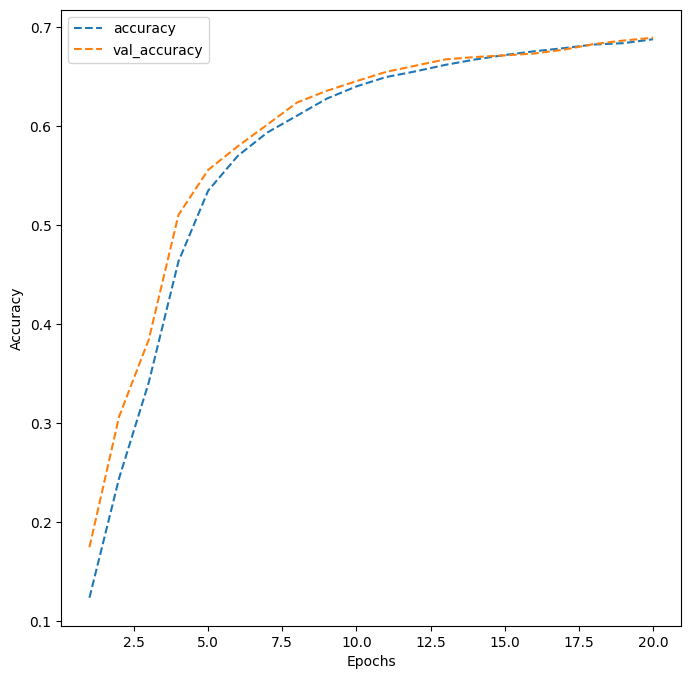

In [20]:
# Plotting the accuracies

dict_hist = history_model_1.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:_______**

Top training accuracy: 0.6877 and Top validation accuracy: 0.6895.

- Validation accuracy slightly exceeds training accuracy. This suggests that the model is not overfitting and generalizes well to unseen data.

- Training and validation accuracy are closely aligned so it indicates stable learning and consistency.

- Overall Accuracy is moderate (69%), so the model may be slightly overfitting or has room for optimization.

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [21]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [22]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture.**

In [23]:
# Define the model

def nn_model_2():

    model = Sequential()

    # Add layers as per the architecture mentioned above in the same sequence

    model.add(Dense(256, activation='relu', input_shape=(1024,)))

    model.add(Dense(128,activation='relu'))

    model.add(Dropout(0.2))

    model.add(Dense(64,activation='relu'))

    model.add(Dense(64,activation='relu'))

    model.add(Dense(32, activation= 'relu'))

    model.add(BatchNormalization())

    model.add(Dense(10, activation='softmax'))

    # Compile the model

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.0005),
                  metrics=['accuracy'])

    return model

In [24]:
# Build the model

model_2 = nn_model_2()

In [25]:
# Print the model summary
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 310,250 (1.18 MB)

 Trainable params: 310,186 (1.18 MB)

 Non-trainable params: 64 (256.00 B)

In [26]:
# Fit the model

history_model_2 = model_2.fit(X_train, y_train,
                              epochs=30,
                              batch_size=128,
                              validation_split=0.2,
                              verbose=1)

Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.1008 - loss: 2.4742 - val_accuracy: 0.0977 - val_loss: 2.3229
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1134 - loss: 2.3043 - val_accuracy: 0.1686 - val_loss: 2.2515
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.2564 - loss: 2.0417 - val_accuracy: 0.4455 - val_loss: 1.6283
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4879 - loss: 1.5107 - val_accuracy: 0.5455 - val_loss: 1.3410
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5626 - loss: 1.3228 - val_accuracy: 0.5989 - val_loss: 1.2239
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6108 - loss: 1.2007 - val_accuracy: 0.6600 - val_loss: 1.0830
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6388 - loss: 1.1207 - val_accuracy: 0.6611 - val_loss: 1.0594
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.6610 - loss: 1.0546 - val_accu

### **Plotting the validation and training accuracies**

### **Write your observations on the below plot.**

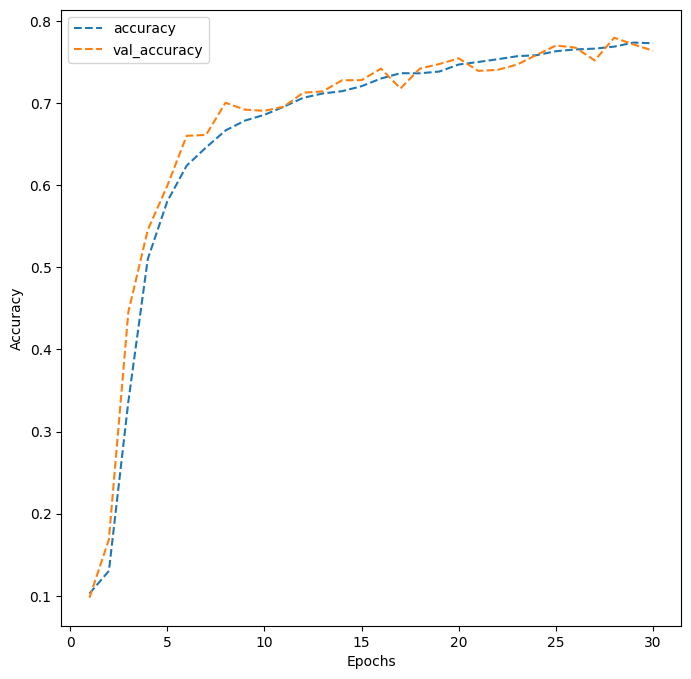

In [27]:
# Plotting the accuracies

dict_hist = history_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:_______**

Top training accuracy: 0.7733 and Top validation accuracy: 0.7636.

- Training accuracy and validation accuracy increase steadily across epochs. The lines are closely aligned.

- Accuracy curves follow a similar upward trajectory.

- No Overfitting. Validation accuracy never significantly lags behing training accuracy. Validation accuracy slightly surpassess training accuracy at times.

- The small gap between training and validation accuracy indicates the model generalizes well to unseen data.

-Both curves start flattening near the end (25 epochs).

Overall Accuracy is decent to good (79%), still has room for optimization.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [28]:
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [29]:
# Converting each entry to single label from one-hot encoded vector

y_test = np.argmax(y_test, axis = -1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1814
           1       0.73      0.81      0.77      1828
           2       0.73      0.79      0.76      1803
           3       0.66      0.76      0.71      1719
           4       0.83      0.81      0.82      1812
           5       0.73      0.72      0.72      1768
           6       0.81      0.73      0.77      1832
           7       0.81      0.78      0.79      1808
           8       0.72      0.73      0.72      1812
           9       0.85      0.68      0.76      1804

    accuracy                           0.76     18000
   macro avg       0.76      0.76      0.76     18000
weighted avg       0.76      0.76      0.76     18000



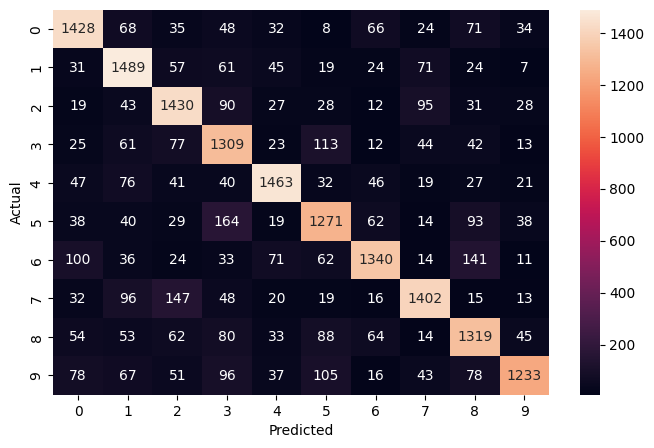

In [30]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test, test_pred)     #Write the code for creating confusion matrix using actual labels (y_test) and predicted labels (test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:__________**


Accuracy 76%
Precision 0.76
Recall 0.76
F1-score

Solid performance for an ANN on a complex image task like digit classification.

Balanced Performance Across Digits: Precision, recall and F1-scores are consitently above 0.70 for all digits, this shows the model generalizes reasonable well.

Best Performing Digits:
- Digit 1 has the highest accuracy.
- Digit 4, 7, 2 and 0 are the top performers, beside 1.

Weakest Performing Digits

- Digit Confusions: 3 and 5, 8 and 9, 4 and 9, 7 and 2. This misclassifications caused by shape similarities and lack of spatial awareness.
- Digit 6 has good precision but lower recall.

Conclusion

The model is well-optimized for its architecture and balanced in predictions.



## **Using Convolutional Neural Networks**

In [32]:
h5f = h5py.File('/content/drive/MyDrive/Colab Notebooks/SVHN_single_grey1.h5', 'r') # Open the HDF5 file

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]


# Close this file

h5f.close()

Let's check the number of images in the training and the testing dataset.

In [33]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**
- There are 42,000 images in the training data and 18,000 images in the testing data.

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [34]:
# Shape and the array of pixels for the first image

print("Shape:", X_train[0].shape)

print()

print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [35]:
# Reshaping the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)

X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

In [36]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train / 255.0

X_test = X_test / 255.0

In [37]:
# New shape

print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [38]:
# Write the function and appropriate variable name to one-hot encode the output

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

# test labels

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

**Observation:**
- Notice that each entry of the target variable is a one-hot encoded vector instead of a single label.

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.

In [39]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [45]:
# Define the model

def cnn_model_1():

    model = Sequential()

    # Add layers as per the architecture mentioned above in the same sequence

    #First Convolutional Layer
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 1)))
    model.add(LeakyReLU(alpha=0.1))

    #Second Convolutional Layer
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))



    #Max Pooling layer

    model.add(MaxPooling2D(pool_size=(2, 2)))

    #Flattening
    model.add(Flatten())

    #Dense Layer
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))

    #Output Layer
    model.add(Dense(10, activation='softmax'))


    # Compile the model

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    return model

In [46]:
# Build the model

cnn_model_1 = cnn_model_1()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [47]:
# Print the model summary

cnn_model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │         262,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 267,306 (1.02 MB)

 Trainable params: 267,306 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Fit the model

history_cnn_model_1 = cnn_model_1.fit(X_train, y_train, validation_split=0.2, batch_size=32, verbose=1, epochs=20)

Epoch 1/20
 898/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.9716 - loss: 0.0823

KeyboardInterrupt: 

### **Plotting the validation and training accuracies**

### **Write your observations on the below plot.**

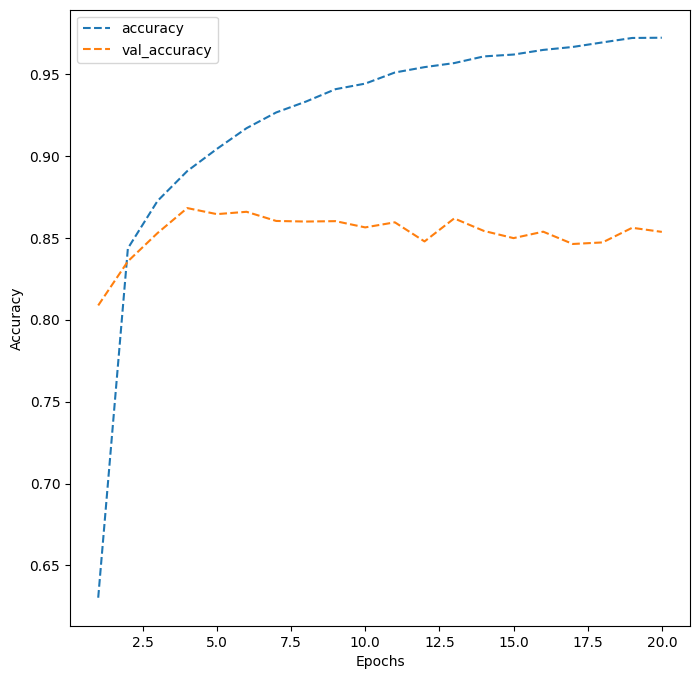

In [50]:
# Plotting the accuracies

dict_hist = history_cnn_model_1.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:__________**

- Validation accuracy reaches 86%, whis is 10% better than the last ANN Model (76%).

- Early Signs of Overfitting, around epoch 6-7, the validation accuracy stops improving, while training accuracy keeps increasing. The model is starting to memorize the training data, instead of learning general patterns.

- The validation line doesn't drop drastically,so the model is not severely overfitting.

- The flatness suggests the model has hit a performance ceiling and may need fine-tuning or regularization.



Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [51]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [52]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [53]:
# Define the model

def cnn_model_2():

    model = Sequential()

    # Add layers as per the architecture mentioned above in the same sequence

    # First Convolutional Layer
    model.add(Conv2D(16, (3,3), padding='same', input_shape=(32,32,1)))
    model.add(LeakyReLU(alpha=0.1))

    # Second Convolutional Layer
    model.add(Conv2D(32, (3,3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())

    # Third Convolutional Layer
    model.add(Conv2D(32, (3,3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    # Fourth Convolutional Layer
    model.add(Conv2D(64, (3,3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())

    # Flattening
    model.add(Flatten())

    #Dense Layer
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.5))

    #Output Layer
    model.add(Dense(10, activation='softmax'))


    # Compile the model

    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    return model

In [54]:
# Build the model

cnn_model_2 = cnn_model_2()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [55]:
# Print the summary

cnn_model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         131,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 164,362 (642.04 KB)

 Trainable params: 164,170 (641.29 KB)

 Non-trainable params: 192 (768.00 B)

In [56]:
# Fit the model

history_cnn_model_2 = cnn_model_2.fit(X_train, y_train, validation_split=0.2,
                                      batch_size=128,
                                      verbose=1,
                                      epochs=30)

Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 134s 486ms/step - accuracy: 0.3483 - loss: 1.8798 - val_accuracy: 0.3065 - val_loss: 2.2030
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 139s 477ms/step - accuracy: 0.7801 - loss: 0.7119 - val_accuracy: 0.8270 - val_loss: 0.6117
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 144s 484ms/step - accuracy: 0.8286 - loss: 0.5728 - val_accuracy: 0.8806 - val_loss: 0.4176
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 136s 462ms/step - accuracy: 0.8491 - loss: 0.5006 - val_accuracy: 0.8895 - val_loss: 0.3919
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 146s 476ms/step - accuracy: 0.8621 - loss: 0.4636 - val_accuracy: 0.8692 - val_loss: 0.4348
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 144s 485ms/step - accuracy: 0.8720 - loss: 0.4131 - val_accuracy: 0.8817 - val_loss: 0.4168
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 138s 471ms/step - accuracy: 0.8820 - loss: 0.3856 - val_accuracy: 0.9021 - val_loss: 0.3502
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 140s 466ms/step - accuracy: 0.8916 -

### **Plotting the validation and training accuracies**

### **Write your observations on the below plot**

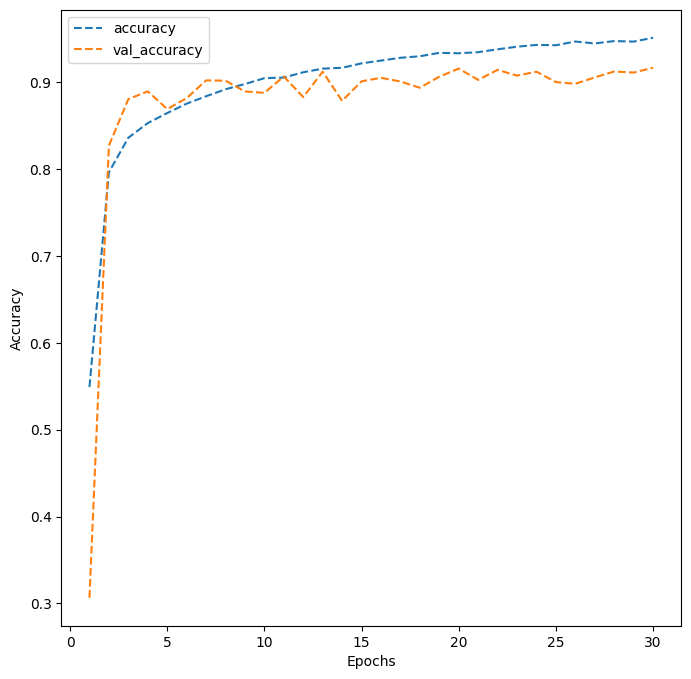

In [57]:
# Plotting the accuracies

dict_hist = history_cnn_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:________**

The plot shows Strong Overall Performance, both the training and validation accuracy are above 90% after epoch 10.

The model is learning well and generalizing nicely to new validation data.

Training accuracy keeps climbing steadily to 95%, while validation accuracy fluctuates a bit arround 91-92%. This gap suggest only minor overfitting, but it is manageable.

Validation accuracy stabilizes from around epoch 10 onwards. This means the model reaches its learning capacity early, and more training isn't making a big difference after that point.
There are no signs of performance drop.

The digits 0,2,4,7 have the highest scores.
There's slightely lower scores for Digits 3, 6, 9.
There's balanced performance and the model is not biased toward any specific digit.

The model is performing very well:
- Accuracy is high
- Overfitting is under control
- Model is stable across epochs.
- Minor expected misclassifications between similar digits.

The model is production-ready :).



## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [58]:
# Make prediction on the test data using model_2

test_pred = cnn_model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

563/563 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [59]:
# Converting each entry to single label from one-hot encoded vector

y_test = np.argmax(y_test, axis = -1)

### **Write your final observations on the performance of the model on the test data.**

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1814
           1       0.91      0.91      0.91      1828
           2       0.93      0.93      0.93      1803
           3       0.86      0.91      0.88      1719
           4       0.91      0.93      0.92      1812
           5       0.90      0.92      0.91      1768
           6       0.92      0.89      0.91      1832
           7       0.93      0.93      0.93      1808
           8       0.92      0.89      0.90      1812
           9       0.93      0.88      0.91      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



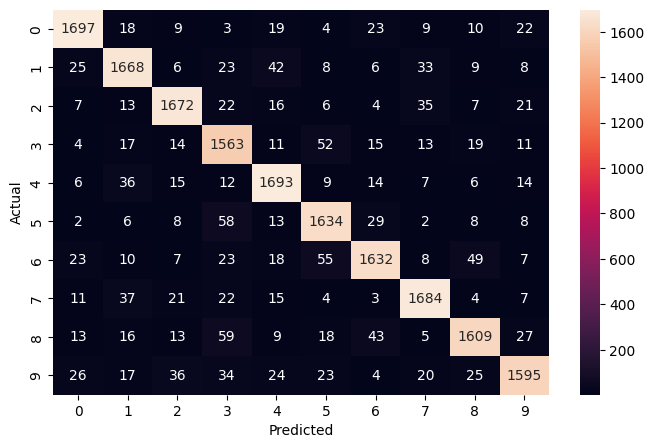

In [60]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:_________**

CNN clearly outperforms the ANN in every important metric for image classification.
ANN showed early signs of overfitting - training accuracy was high, but validation accuracy plateaued.
CNN handled digit variations much better, especially for confusing digits like 3,5 and 9.

The second CNN model (4 convolutional layers) is the best-performing model in my project.
It's accurate, generalizes better and handles image complexity far more effectively than the AMM.


In this project, we compared different neural network architectures to classify handwritten digits, specifically using an Artificial Neural Network (ANN) and a Convolutional Neural Network (CNN). The ANN model reached a validation accuracy of 76%, but showed signs of overfitting and struggled with visually similar digits. In contrast, the first CNN model achieved 86% , while the second CNN model with four convolutional layers architecture achieved a significantly higher accuracy of 91%, demonstrating much better generalization and more consistent performance across all classes. The CNN also produced a more balanced classification report and fewer misclassifications in the confusion matrix. Overall, the secondCNN model proved to be the most effective approach for this image-based digit recognition task.

